In [1]:
import sys
sys.path.append('..')
from core import *

In [2]:
specsdb = ramanfrom('../muestras/ogompa')

In [3]:
print(len(specsdb.raman_dict))
print(len(specsdb.raman_index))

20
20


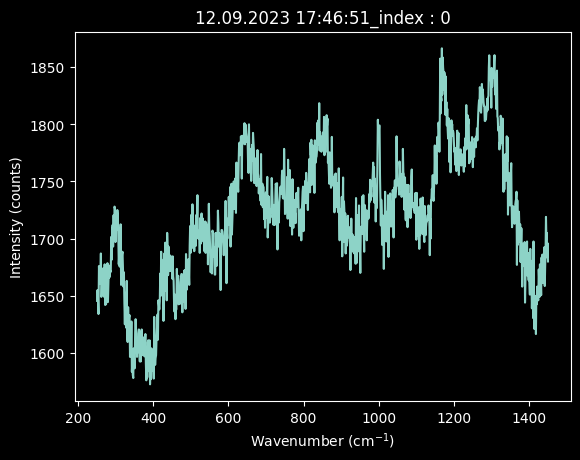

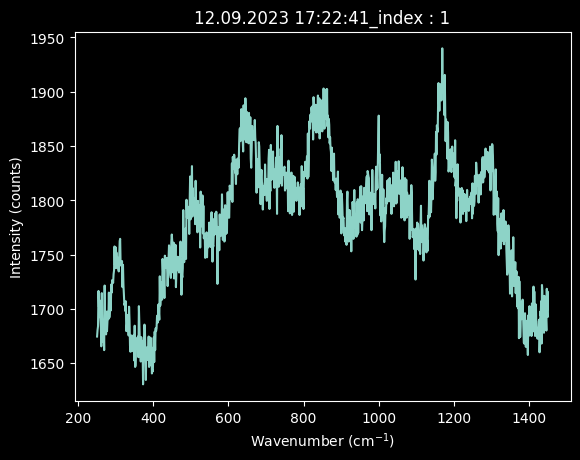

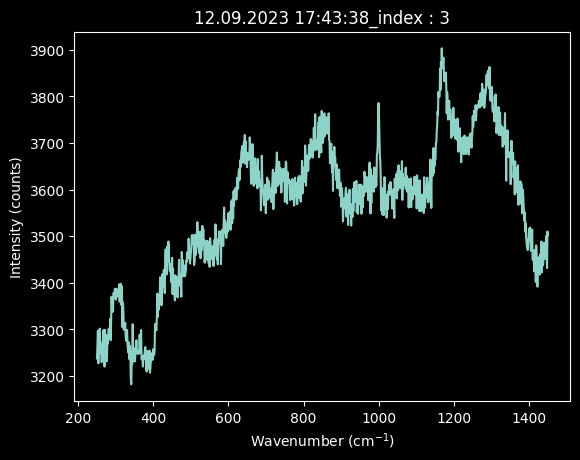

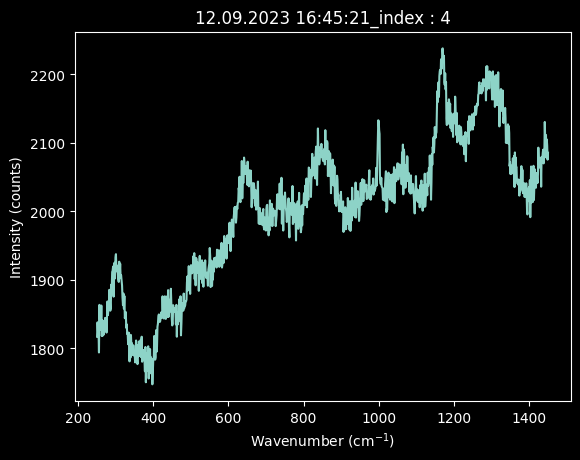

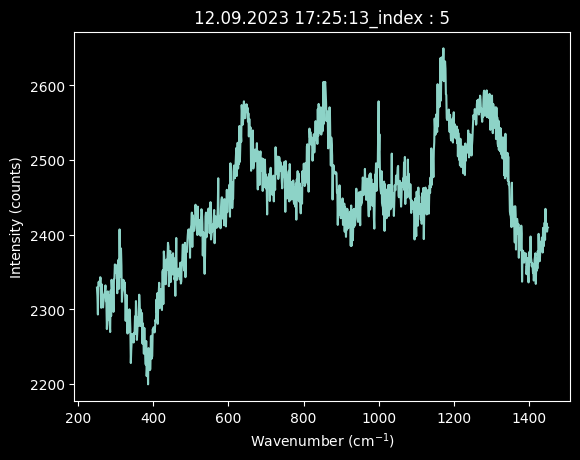

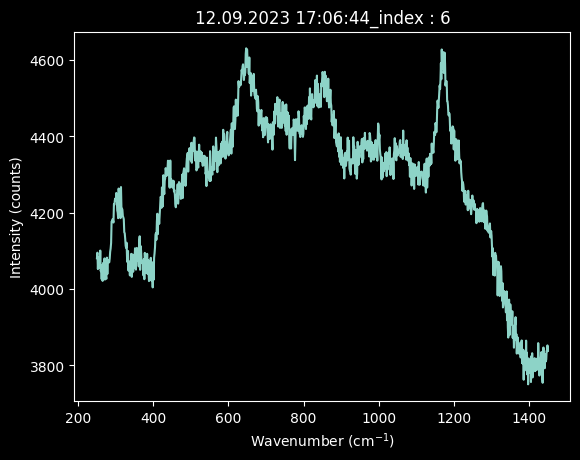

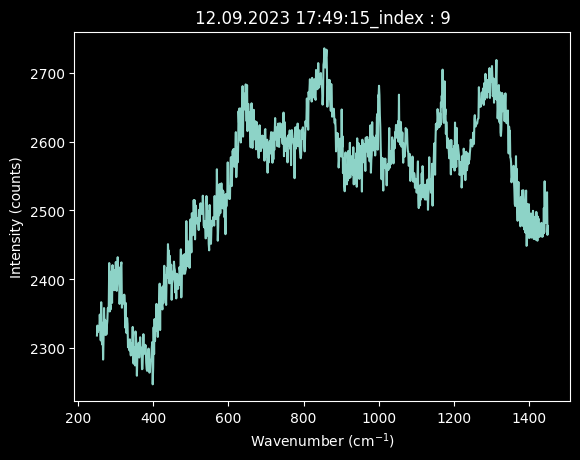

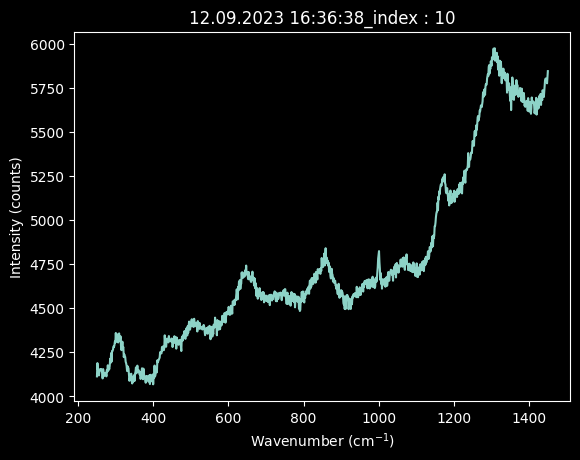

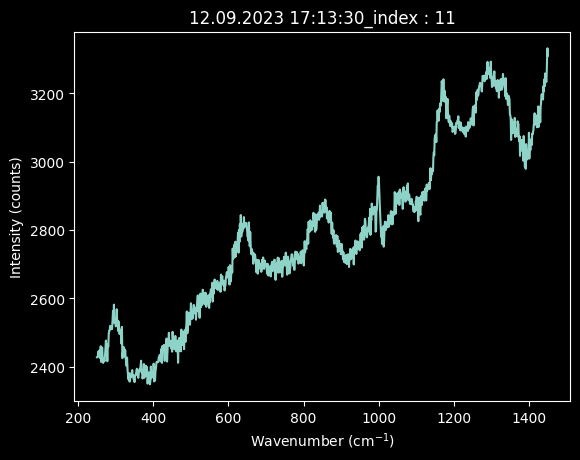

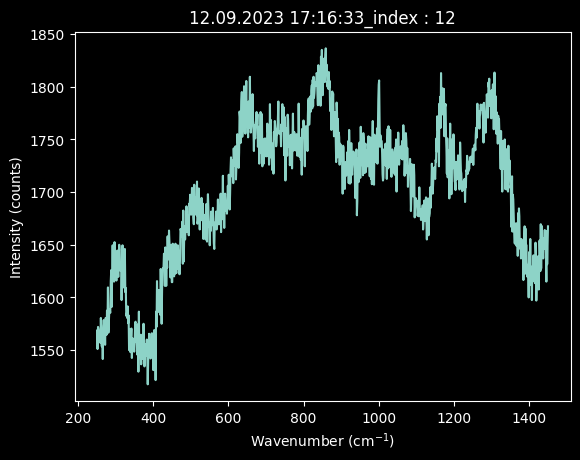

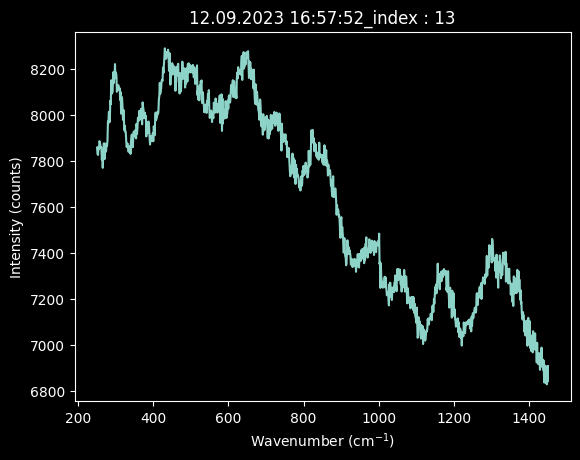

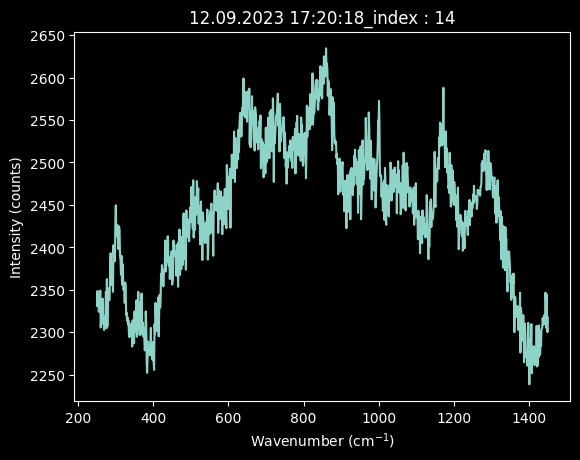

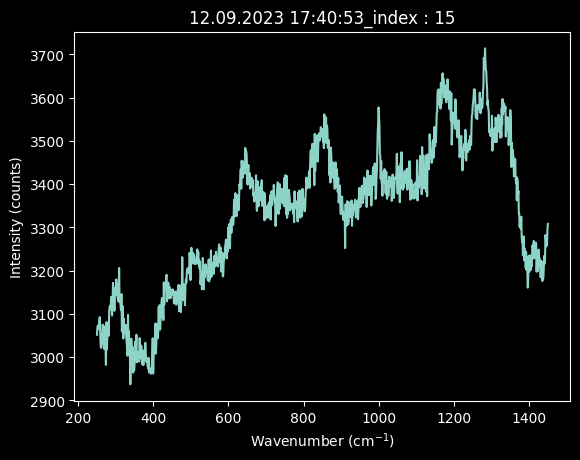

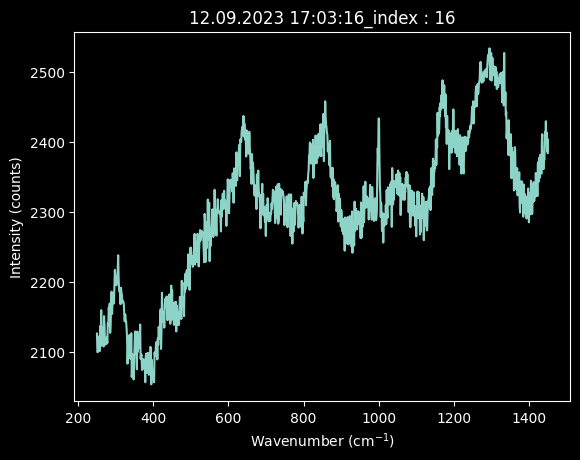

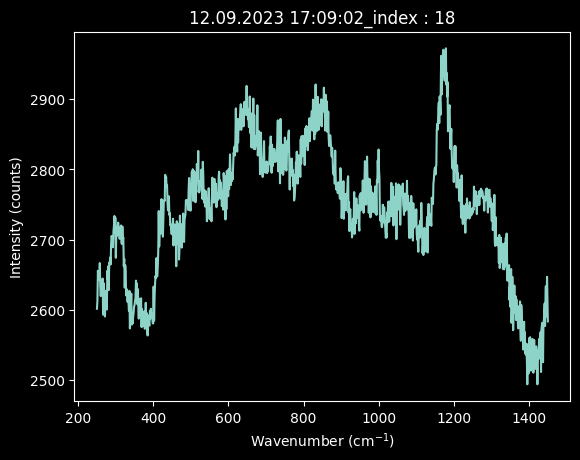

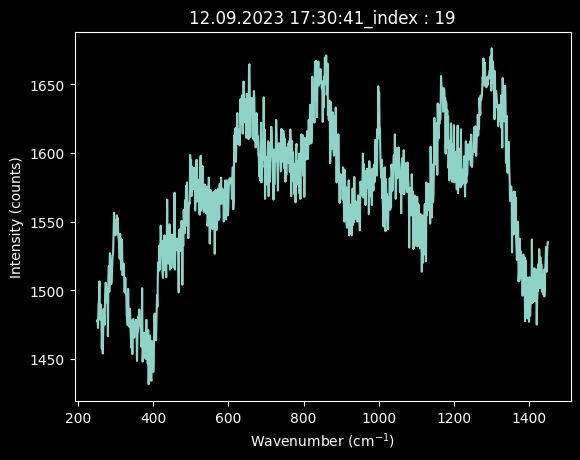

<Figure size 640x480 with 0 Axes>

In [6]:
for k,v in specsdb.raman_dict.items():
    v.crop(250,1450, show=True)

In [5]:
for index in (17,8,7,2):
    specsdb.pop(index)

<class 'numpy.ndarray'> <class 'list'>
The lenghts 1038 1038


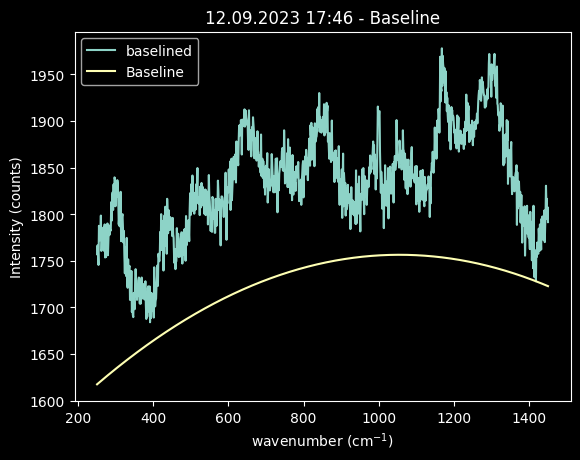

<class 'numpy.ndarray'> <class 'list'>
The lenghts 1038 1038


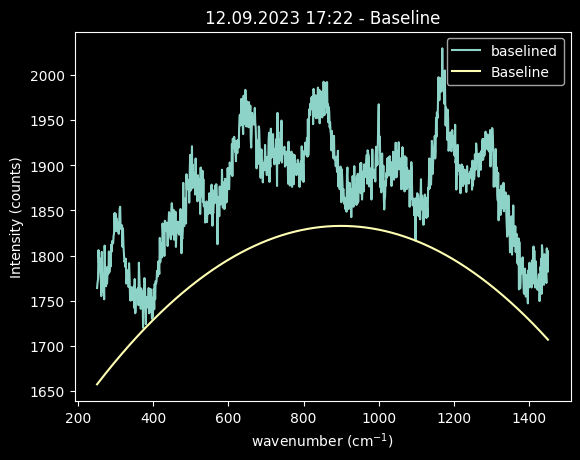

<class 'numpy.ndarray'> <class 'list'>
The lenghts 1038 1038


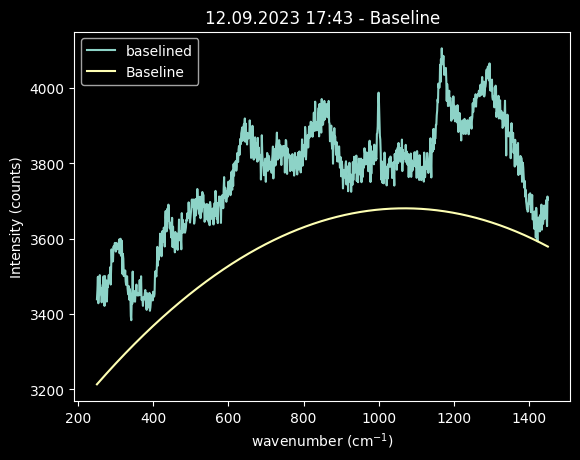

<class 'numpy.ndarray'> <class 'list'>
The lenghts 1038 1038


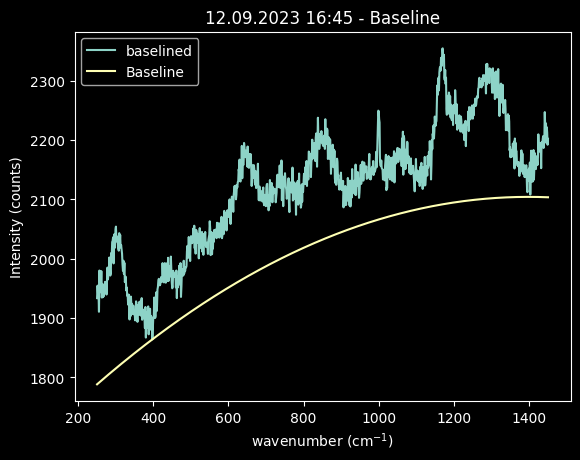

<class 'numpy.ndarray'> <class 'list'>
The lenghts 1038 1038


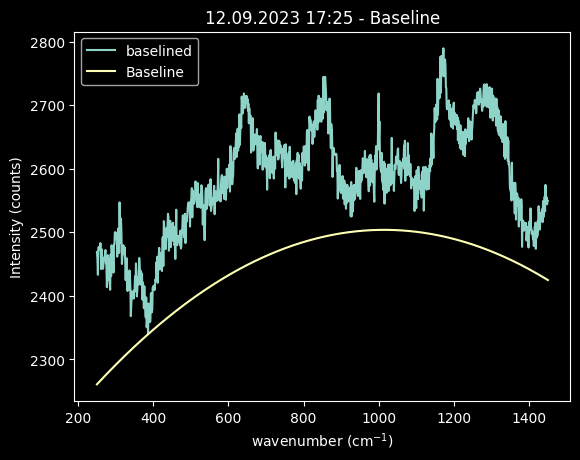

<class 'numpy.ndarray'> <class 'list'>
The lenghts 1038 1038


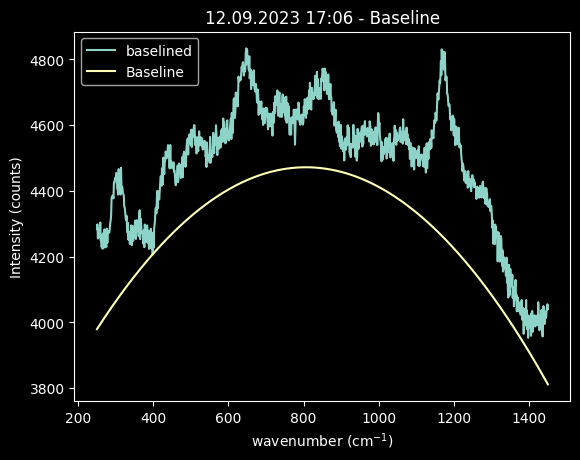

<class 'numpy.ndarray'> <class 'list'>
The lenghts 1038 1038


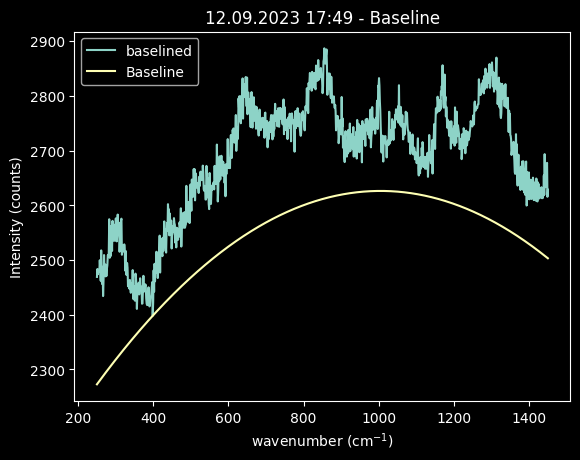

<class 'numpy.ndarray'> <class 'list'>
The lenghts 1038 1038


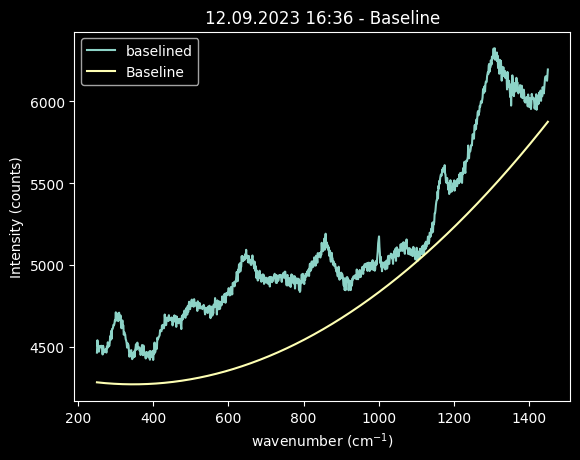

<class 'numpy.ndarray'> <class 'list'>
The lenghts 1038 1038


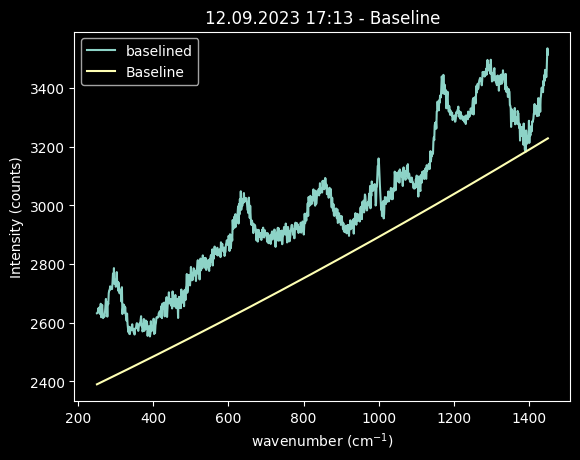

<class 'numpy.ndarray'> <class 'list'>
The lenghts 1038 1038


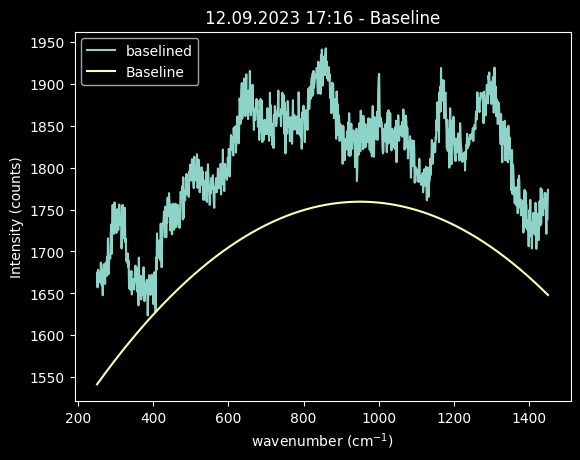

<class 'numpy.ndarray'> <class 'list'>
The lenghts 1038 1038


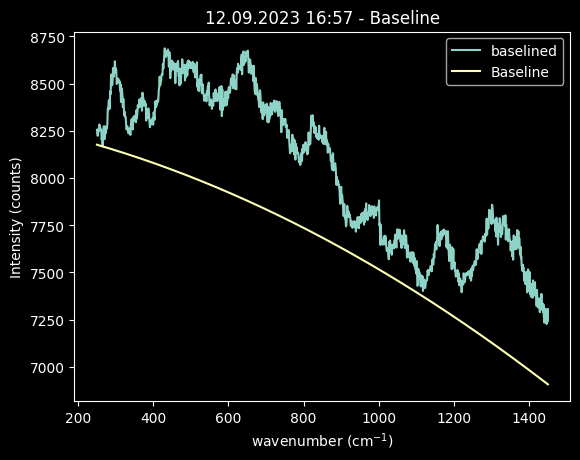

<class 'numpy.ndarray'> <class 'list'>
The lenghts 1038 1038


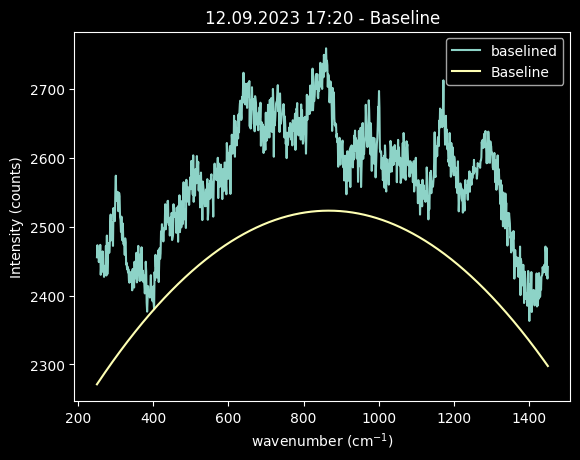

<class 'numpy.ndarray'> <class 'list'>
The lenghts 1038 1038


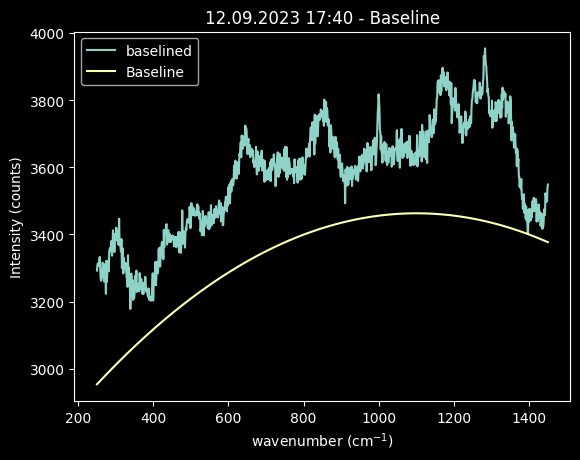

<class 'numpy.ndarray'> <class 'list'>
The lenghts 1038 1038


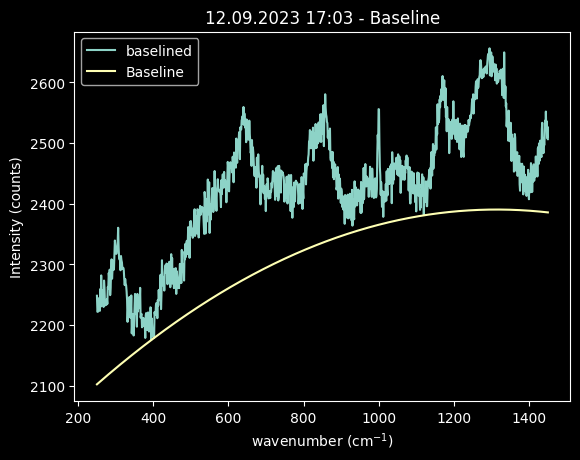

<class 'numpy.ndarray'> <class 'list'>
The lenghts 1038 1038


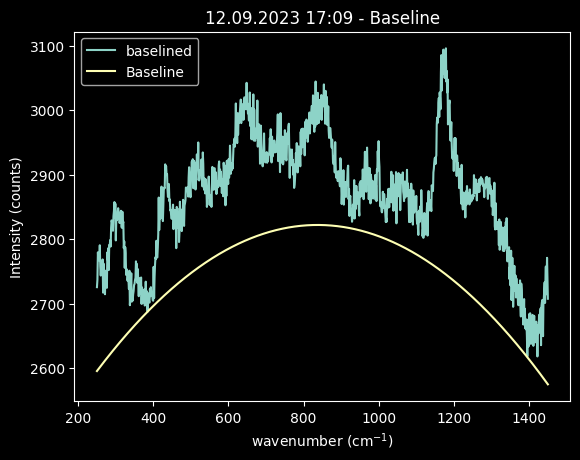

<class 'numpy.ndarray'> <class 'list'>
The lenghts 1038 1038


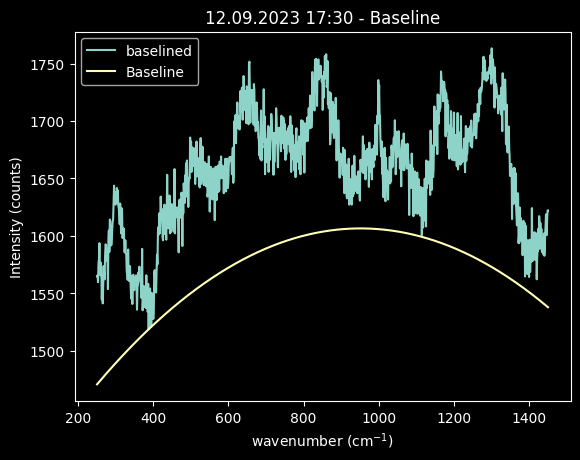

<Figure size 640x480 with 0 Axes>

In [7]:
for k,v in specsdb.raman_dict.items():
    v.crop(250,1450, show=False)
    v.sav_gol(10,4,show=False)
    v.baseline(x=v.croppedx,y=v.croppedy,degree=2,show=True)

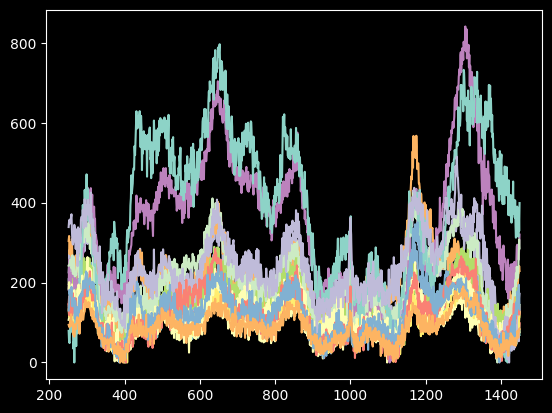

In [8]:
for k,v in specsdb.raman_dict.items():
    plt.plot(v.basedx,v.basedy)

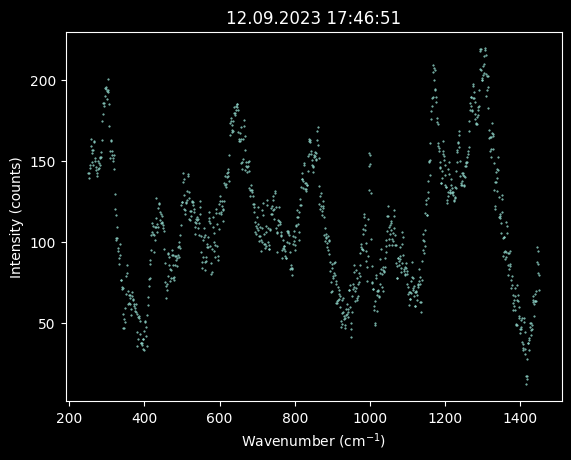

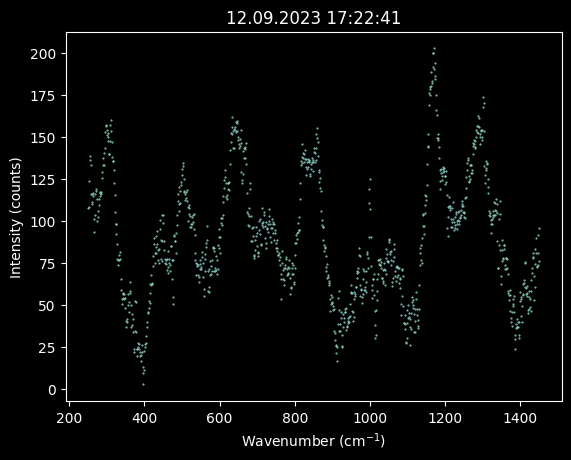

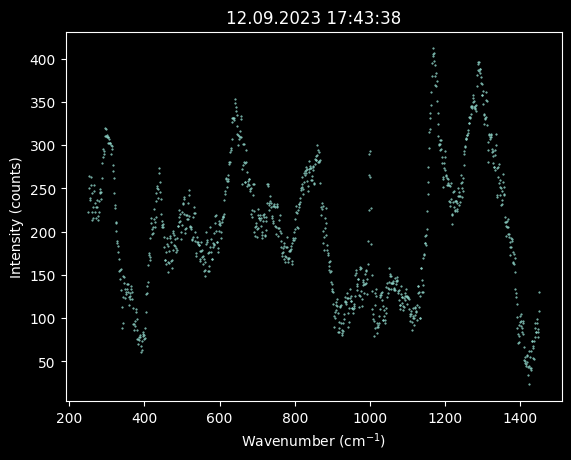

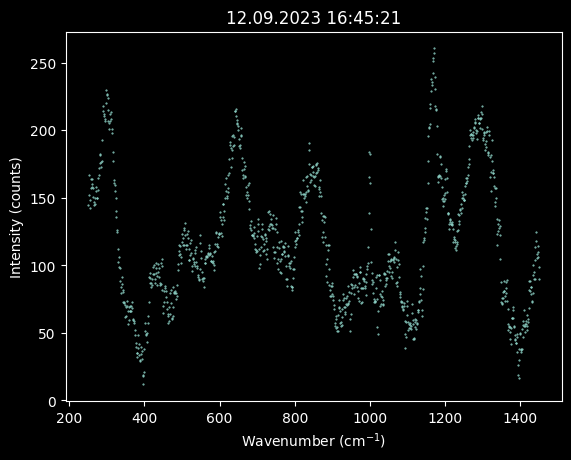

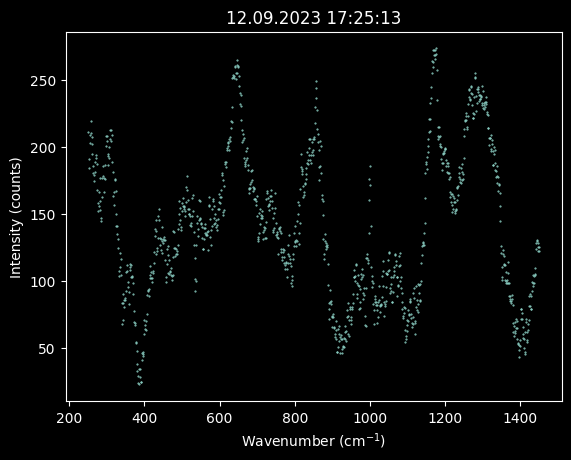

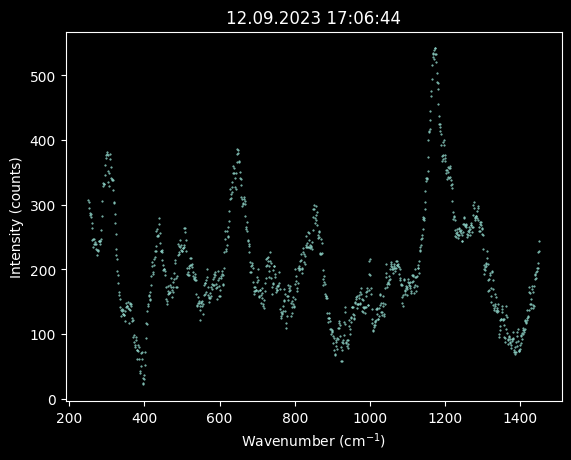

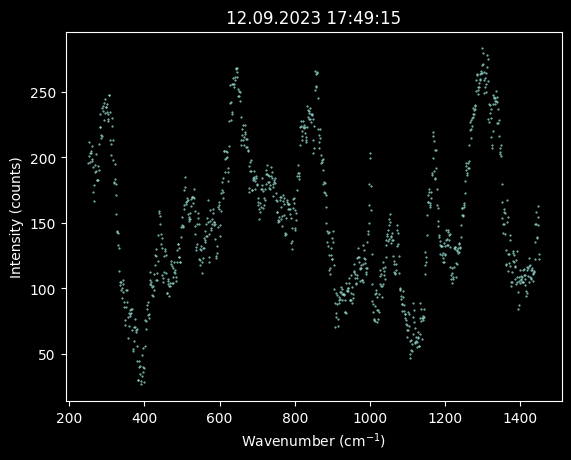

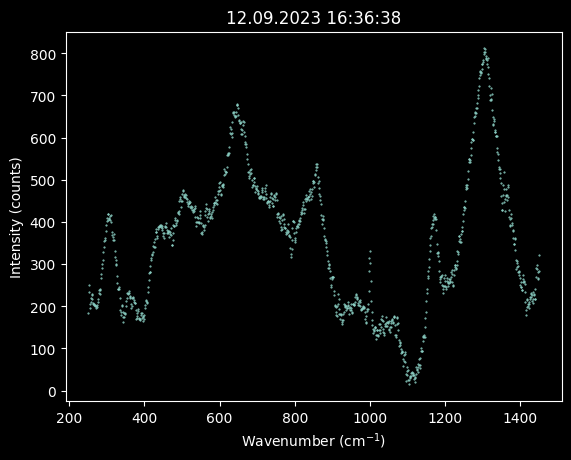

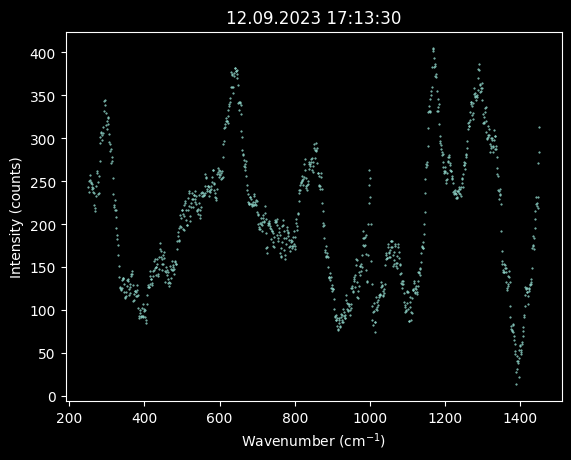

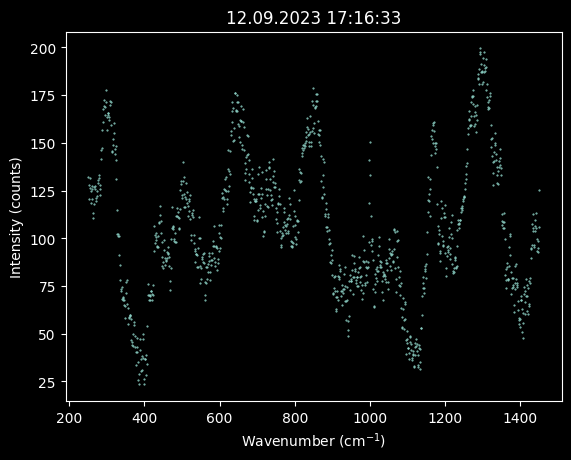

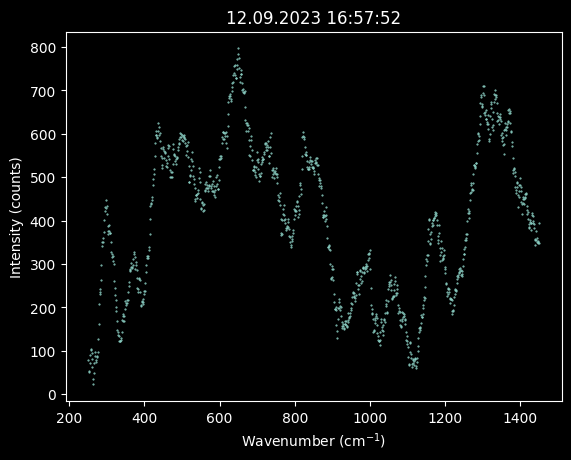

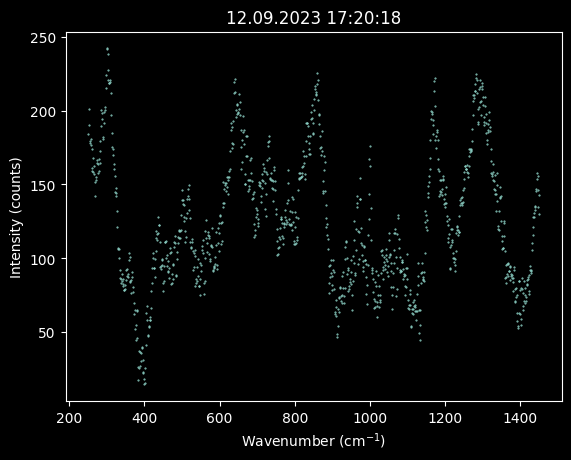

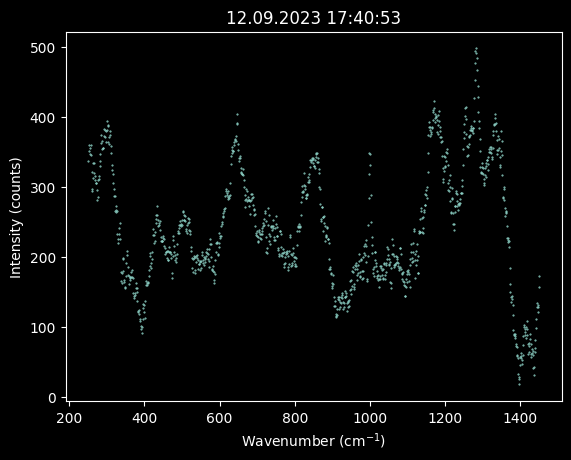

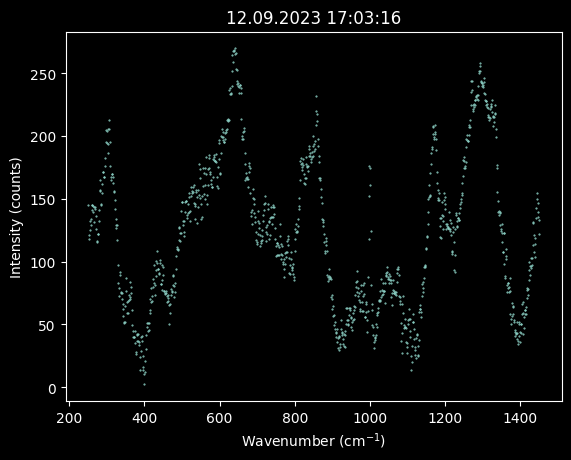

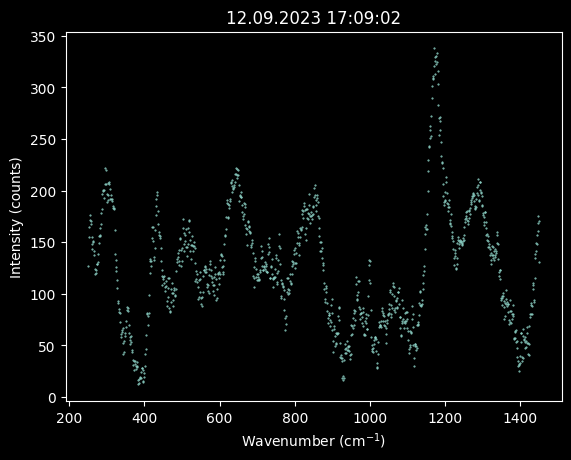

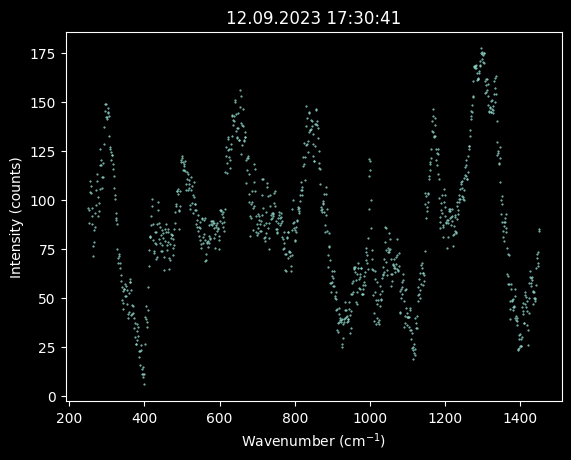

<Figure size 640x480 with 0 Axes>

In [9]:
for k,v in specsdb.raman_dict.items():
    # here we normalize to the max value in the v.basedy
    v.sav_gol(x=v.basedx,y=v.basedy,window=10,order=5)

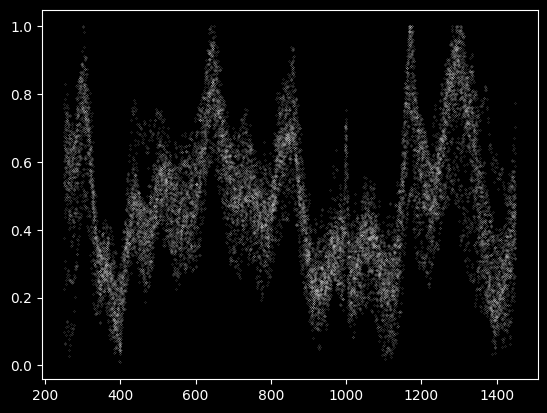

In [14]:
# Now we create a one plot with all the data of the denoisedx and denoisedy
# ploting small points of data of green color

for k,v in specsdb.raman_dict.items():
    plt.plot(v.denoisedx,v.denoisedy/np.max(v.denoisedy),'w.',markersize=0.2)

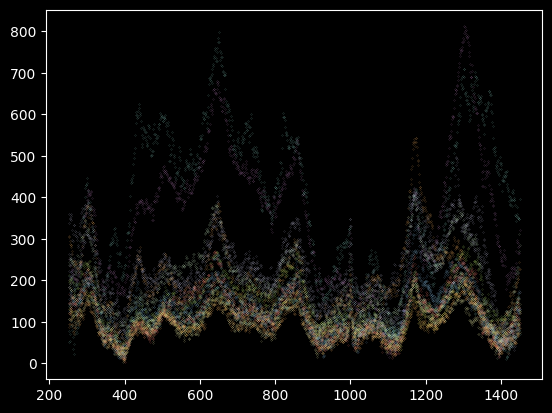

In [15]:
# Now we let the color of each v be different and we plot the data

for k,v in specsdb.raman_dict.items():
    plt.plot(v.denoisedx,v.denoisedy,'.',markersize=0.2)

In [76]:
# for wavelet in pywt.wavelist():
#     try:
#         coef, freqs=pywt.cwt(test_raman.croppedy,np.arange(1,200),wavelet)
#         # Plot the scalogram
#         plt.figure(figsize=(20,6))
#         plt.imshow(coef, aspect='auto',vmax=abs(coef).max(), vmin=-abs(coef).max())
#         plt.title(wavelet)
#         plt.show()
#     except:
#         pass

In [77]:
# # Import pywt library

# import pywt

# # Compute the wavelet transform to plot the scalogram
# for k, v in ramans.ramanspecs.items():
#     coef, freqs=pywt.cwt(v.croppedy,np.arange(1,200),'morl')

#     # Plot the scalogram
#     plt.figure(figsize=(20,6))
#     plt.imshow(coef, aspect='auto',vmax=abs(coef).max(), vmin=-abs(coef).max())
#     plt.title(k)
#     plt.show()